In [1]:
import numpy as np
import xarray as xr
#import geopandas as geo
#import salem
from cdo import *
from cdo import Cdo
cdo = Cdo()

import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import linregress
from scipy import signal
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [7]:
tem_82_84 = xr.open_dataset('/mnt/f/遥感资料/1km_month_tem/tmp_1982_2017/tmp_1982_1984.nc')
tem_82_84

<xarray.Dataset>
Dimensions:  (lon: 7680, lat: 4717, time: 36)
Coordinates:
  * lon      (lon) float64 72.2 72.21 72.22 72.23 ... 136.2 136.2 136.2 136.2
  * lat      (lat) float64 55.55 55.55 55.54 55.53 ... 16.28 16.27 16.26 16.25
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 32.0 33.0 34.0 35.0 36.0
Data variables:
    tmp      (time, lat, lon) float32 ...

In [5]:
tem_82_84 = xr.open_dataset('/mnt/f/遥感资料/1km_month_tem/tmp_1982_2017/tmp_1982_1984.nc')
tem_year_8284 = np.full((3,7680,4717),np.nan)
tem_year_8284[0,:,:] = np.nanmean(tem_82_84.tmp[0:12,:,:])
tem_year_8284[1,:,:] = np.nanmean(tem_82_84.tmp[12:24,:,:])
tem_year_8284[2,:,:] = np.nanmean(tem_82_84.tmp[24:36,:,:])

#创建nc数组
lon_ndvi = tem_82_84.lon
lat_ndvi = tem_82_84.lat
year = np.array([1982,1983,1984])
ndvi = xr.DataArray(tem_year_8284,coords=[year,lon_ndvi,lat_ndvi],dims=['time','lon','lat'])
ndvi= xr.Dataset({'tmp':tem_year_8284})
ndvi.to_netcdf('/mnt/f/遥感资料/1km_month_tem/tmp_1982_2017/tmp_year_1982_1984.nc')

MissingDimensionsError: cannot set variable 'tmp' with 3-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [ ]:
filename = os.listdir('/mnt/f/remote_sensing/1km_month_tem/')

tem_year = np.full((36,7680,4717),np.nan)

i = 0
for file in filename:
    inputfile = os.path.join(filename,file)
    tem = xr.open_dataset(inputfile)
    tem_year[i,:,:] = np.nanmean(tem.tmp[0:12,:,:])
    tem_year[i+1,:,:] = np.nanmean(tem.tmp[12:24,:,:])
    tem_year[i+2,:,:] = np.nanmean(tem.tmp[24:36,:,:])
    i = i + 3

In [5]:
#把土地类型数据从tiff转nc，用nc处理
import rioxarray
tiffile = '/mnt/d/study/大三/湿地保护/数据/1km栅格数据_2020年/ndvi.tif'
ncfile = '/mnt/d/study/大三/湿地保护/数据/1km栅格数据_2020年/ndvi.nc'
xds = rioxarray.open_rasterio(tiffile)
xds.rio.to_raster(ncfile)

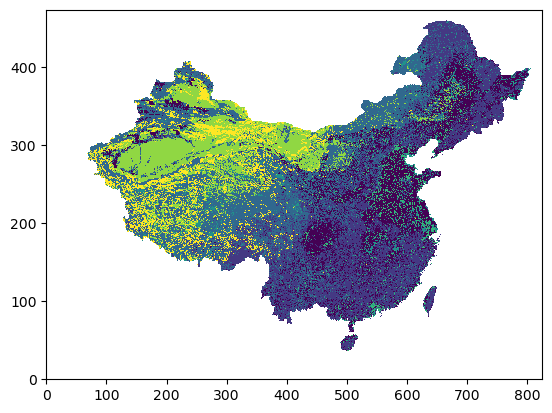

In [3]:
shidi_ndvi = xr.open_dataset('/mnt/d/study/大三/湿地保护/数据/1km栅格数据_2020年/ndvi.nc')
plt.pcolormesh(shidi_ndvi.Band1)

In [ ]:
cdo.sellonlatbox( '103.5,104.5,30,31',input = '/mnt/f/cn05/Climite/1982-2015/cn05.1_pre_1982_2015.nc' ,output ='/mnt/f/cn05/Climite/chengdu/cn05.1_pre_1982_2015.nc' )
cdo.sellonlatbox( '103.5,104.5,30,31',input = '/mnt/f/cn05/Climite/1982-2015/cn05.1_tm_1982_2015.nc' ,output ='/mnt/f/cn05/Climite/chengdu/cn05.1_tm_1982_2015.nc' )

In [ ]:
filename = os.listdir('/mnt/f/NDVI/')
for file in filename:
    inputfile = os.path.join('/mnt/f/NDVI/',file)
    outputfile = os.path.join('/mnt/f/cn05/Climite/chengdu/NDVI_0_1/', file)
    cdo.setvrange('0,10000',input= inputfile,output=outputfile)

In [7]:
filename = os.listdir('/mnt/f/cn05/Climite/chengdu/NDVI_0_1/')
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/Climite/chengdu/NDVI_0_1/',file)
    outputfile = os.path.join('/mnt/f/cn05/Climite/chengdu/NDVI/', file)
    cdo.setgrid('lonlat',input= inputfile,output=outputfile)

In [8]:
filename = os.listdir('/mnt/f/cn05/Climite/chengdu/NDVI/')
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/Climite/chengdu/NDVI/',file)
    outputfile = os.path.join('/mnt/f/cn05/Climite/chengdu/NDVI_chengdu/', file)
    cdo.sellonlatbox('103.5,104.5,30,31',input= inputfile,output=outputfile)

In [12]:
filename = os.listdir('/mnt/f/cn05/Climite/chengdu/NDVI_chengdu/0106/')
i = 1982
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/Climite/chengdu/NDVI_chengdu/0106',file)
    ndvis = xr.open_dataset(inputfile)
    output01=ndvis.ndvi[0:2,:,:]
    output02=ndvis.ndvi[2:4,:,:]
    output03=ndvis.ndvi[4:6,:,:]
    output04=ndvis.ndvi[6:8,:,:]
    output05=ndvis.ndvi[8:10,:,:]
    output06=ndvis.ndvi[10:12,:,:]
    outputfile01 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_01.nc4" ).format(i)
    outputfile02 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_02.nc4" ).format(i)
    outputfile03 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_03.nc4" ).format(i)
    outputfile04 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_04.nc4" ).format(i)
    outputfile05 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_05.nc4" ).format(i)
    outputfile06 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_06.nc4" ).format(i)
    output01.to_netcdf(path = outputfile01)
    output02.to_netcdf(path = outputfile02)
    output03.to_netcdf(path = outputfile03)
    output04.to_netcdf(path = outputfile04)
    output05.to_netcdf(path = outputfile05)
    output06.to_netcdf(path = outputfile06)
    i=i+1

In [13]:
filename = os.listdir('/mnt/f/cn05/Climite/chengdu/NDVI_chengdu/0712/')
i = 1982
for file in filename:
    inputfile = os.path.join('/mnt/f/cn05/Climite/chengdu/NDVI_chengdu/0712',file)
    ndvis = xr.open_dataset(inputfile)
    output01=ndvis.ndvi[0:2,:,:]
    output02=ndvis.ndvi[2:4,:,:]
    output03=ndvis.ndvi[4:6,:,:]
    output04=ndvis.ndvi[6:8,:,:]
    output05=ndvis.ndvi[8:10,:,:]
    output06=ndvis.ndvi[10:12,:,:]
    outputfile01 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_07.nc4" ).format(i)
    outputfile02 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_08.nc4" ).format(i)
    outputfile03 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_09.nc4" ).format(i)
    outputfile04 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_10.nc4" ).format(i)
    outputfile05 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_11.nc4" ).format(i)
    outputfile06 = os.path.join('/mnt/f/cn05/Climite/chengdu/month/',"{}_12.nc4" ).format(i)
    output01.to_netcdf(path = outputfile01)
    output02.to_netcdf(path = outputfile02)
    output03.to_netcdf(path = outputfile03)
    output04.to_netcdf(path = outputfile04)
    output05.to_netcdf(path = outputfile05)
    output06.to_netcdf(path = outputfile06)
    i=i+1

In [2]:
def MCV(ndvi):
    NDVI=np.nanmax(ndvi,axis=0)
    return NDVI

In [3]:
NDVI_matrix =np.full((408,12,12),fill_value=np.nan)
path = '/mnt/f/cn05/Climite/chengdu/month/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    input_ndvi = xr.open_dataset(inputfile)
    NDVI_matrix[i,:,:] = MCV(input_ndvi.ndvi)
    i=i+1

In [4]:
def MEAN(ndvi):
    NDVI=np.nanmean(ndvi,axis=0)
    return NDVI

year_NDVI = np.full((34,12,12),fill_value=np.nan)

i = 0
for j in range(34):
    year_NDVI[j,:,:]=MEAN(NDVI_matrix[i:i+12,:,:])
    i=i+12

In [5]:
area_mean_NDVI = np.full(34,fill_value=np.nan)
i = 0
for j in range(34):
    area_mean_NDVI[i] = np.nanmean(year_NDVI[j,:,:])
    i = i + 1

In [5]:
Mean_NDVI=area_mean_NDVI/10000
Mean_NDVI

NameError: name 'area_mean_NDVI' is not defined

In [3]:
Mean_NDVI = np.array([0.56921632, 0.56245417, 0.54374618, 0.54787552, 0.57630388,0.56874583, 0.55514126, 0.55977841, 0.58282465, 0.57699769,0.55975093, 0.5439684 , 0.53296071, 0.5775202 , 0.56866719,0.55482824, 0.56794902, 0.55420226, 0.53228299, 0.54618953,0.57108692, 0.54614763, 0.56971927, 0.55697789, 0.57850284,0.56236169, 0.56385654, 0.54091296, 0.5599331 , 0.5796173 ,0.54044659, 0.57044404, 0.57915492, 0.58693119])

In [4]:
Mean_tm = np.array([15.13678741, 15.42730808, 14.9689312 , 15.19445419, 15.18932533,15.94319153, 15.13546944, 15.07220936, 15.79996109, 15.59584618,15.13807869, 15.41093349, 16.03179932, 15.66666603, 15.07892036,15.89861298, 16.58696747, 16.00185394, 15.76689529, 16.33409691,16.38202858, 16.2171917 , 16.01578331, 15.89859581, 16.78046799,16.7372818 , 16.11341476, 16.51630592, 16.09251404, 15.97434807,15.78709698, 16.98282242, 16.23069572, 17.06403351])

In [5]:
Mean_pre = np.array([2.54923749, 2.51485109, 3.17142487, 2.96834779, 2.27285028,2.43934107, 3.12854195, 2.51198602, 3.24033833, 2.03235221,2.5823307 , 2.17458129, 2.20749283, 2.95751333, 2.23811555,2.16241121, 2.87676954, 2.75126338, 2.13695455, 2.92373395,2.29536057, 2.21692204, 2.32889295, 2.54149604, 1.83097565,2.14120293, 2.59946966, 2.29832196, 2.54832268, 2.3960762 ,2.34846258, 3.93128848, 3.28444648, 2.99394989])

In [10]:
Mean_tm =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/Climite/chengdu/tm/'
filename = os.listdir(path)
i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    tm = xr.open_dataset(inputfile)
    Mean_tm[i] = np.nanmean(tm.tm)
    i = i + 1
Mean_tm

array([15.13678741, 15.42730808, 14.9689312 , 15.19445419, 15.18932533,
       15.94319153, 15.13546944, 15.07220936, 15.79996109, 15.59584618,
       15.13807869, 15.41093349, 16.03179932, 15.66666603, 15.07892036,
       15.89861298, 16.58696747, 16.00185394, 15.76689529, 16.33409691,
       16.38202858, 16.2171917 , 16.01578331, 15.89859581, 16.78046799,
       16.7372818 , 16.11341476, 16.51630592, 16.09251404, 15.97434807,
       15.78709698, 16.98282242, 16.23069572, 17.06403351])

In [11]:
np.mean(Mean_tm)

15.887379085316377

In [12]:
Mean_pre =np.full(34,fill_value=np.nan)
path = '/mnt/f/cn05/Climite/chengdu/pre/'
filename = os.listdir(path)

i = 0
for file in filename:
    inputfile = os.path.join(path,file)
    pre = xr.open_dataset(inputfile)
    Mean_pre[i] = np.nanmean(pre.pre)
    i = i +1
Mean_pre

array([2.54923749, 2.51485109, 3.17142487, 2.96834779, 2.27285028,
       2.43934107, 3.12854195, 2.51198602, 3.24033833, 2.03235221,
       2.5823307 , 2.17458129, 2.20749283, 2.95751333, 2.23811555,
       2.16241121, 2.87676954, 2.75126338, 2.13695455, 2.92373395,
       2.29536057, 2.21692204, 2.32889295, 2.54149604, 1.83097565,
       2.14120293, 2.59946966, 2.29832196, 2.54832268, 2.3960762 ,
       2.34846258, 3.93128848, 3.28444648, 2.99394989])

In [13]:
np.mean(Mean_pre)

2.576341927051544

In [4]:
year = np.arange(1982,2016,1)
s1,d1,r1,p1,_ = linregress(year,Mean_tm)
s2,d2,r2,p2,_=linregress(year,Mean_pre)
s3,d3,r3,p3,_=linregress(year,Mean_NDVI)
print(s1,d1,r1,p1,s2,d2,r2,p2,s3,d3,r3,p3)

NameError: name 'Mean_tm' is not defined

In [2]:
year = np.arange(1982,2016,1)
s1 = 0.04537270111014044 
d1 = -74.78996408329928 
s2 = 0.0018003883937372333 
d2 = -1.0217342778323166 
s3 = 0.00017365916694960868 
p3 = 0.21433910304020481

NameError: name 'Mean_tm' is not defined

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


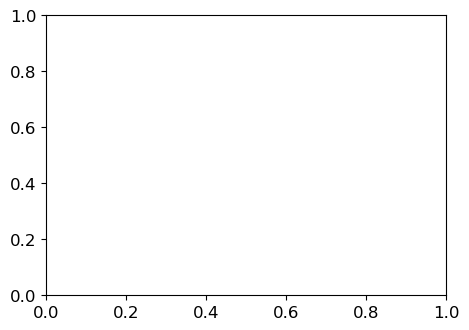

In [3]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '12'
fig1=plt.figure(figsize=(8,7))
ax2 = fig1.add_axes([0.0,0.0,0.5,0.4])
ax2 .plot(year,Mean_tm,lw=0.8,marker='o',color='k',ms='4')
ax2.set_title('A ',fontsize=14,loc='left')
ax2.plot(year,s1*year+d1,'k--',lw=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('℃')
ax2.text(2001,15.5,'y=0.0454x-74.79 ')
ax2.text(2001,15.3,'R²=0.61  p<0.01')
ax1=fig1.add_axes([0.0,-0.55,0.5,0.4])
ax1 .plot(year,Mean_pre,lw=0.8,marker='o',color='k',ms='4')
ax1.set_title('B ',fontsize=14,loc='left')
ax1.plot(year,s2*year+d2,'k--',lw=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('mm')
ax1.text(1995,3.5,'y=0.0018x-1.02 ')
ax1.text(1995,3.3,'R²=0.002 ')

Text(1996, 0.58, 'R²=0.01')

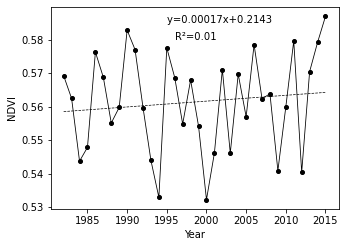

In [37]:
fig2=plt.figure(figsize=(8,7))
ax3 = fig2.add_axes([0.0,0.0,0.5,0.4])
ax3 .plot(year,Mean_NDVI,lw=0.8,marker='o',color='k',ms='4')
ax3.plot(year,s3*year+d3,'k--',lw=0.7)
ax3.set_xlabel('Year')
ax3.set_ylabel('NDVI')
ax3.text(1995,0.585,'y=0.00017x+0.2143 ')
ax3.text(1996,0.58,'R²=0.01')

In [38]:
R,P=pearsonr(Mean_tm,Mean_NDVI)
R,P

(0.2084814696837744, 0.23671744418733018)

In [39]:
R2,P2=pearsonr(Mean_pre,Mean_NDVI)
R2,P2

(0.20032511007570192, 0.25597499444301697)

In [40]:
ndvi_trend=signal.detrend(Mean_NDVI,axis=0,type='linear')
tm_trend =signal.detrend(Mean_tm,axis=0,type='linear')
pre_trend =signal.detrend(Mean_pre,axis=0,type='linear')

In [41]:
R3,P3=pearsonr(tm_trend,ndvi_trend)
R3,P3

(0.1872629716938068, 0.28891904650345795)

In [42]:
R4,P4=pearsonr(pre_trend,ndvi_trend)
R4,P4

(0.19711551946081174, 0.2638292162705873)

In [14]:
from sklearn import linear_model

In [21]:
lin=linear_model.LinearRegression(fit_intercept=True)

In [16]:
Mean_NDVI2=Mean_NDVI.reshape(34,1)
Mean_tm2=Mean_tm.reshape(34,1)
Mean_pre2=Mean_pre.reshape(34,1)
ttt=np.concatenate((Mean_tm2,Mean_pre2),axis=1)

In [20]:
z_scaler = preprocessing.StandardScaler()
trendX_z =z_scaler.fit_transform(ttt)
trendndvi_z=z_scaler.fit_transform(Mean_NDVI2)

In [22]:
exaple=lin.fit(trendX_z,trendndvi_z)
print(exaple.coef_)
print(exaple.intercept_)

[[0.19430389 0.18547245]]
[4.35015377e-15]


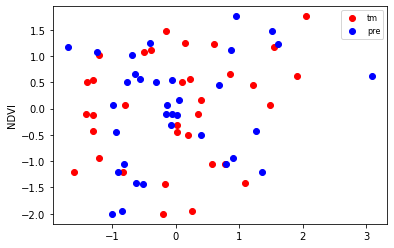

In [36]:
plt.scatter(trendX_z[:,0],trendndvi_z,label='tm',color='r')
plt.scatter(trendX_z[:,1],trendndvi_z,label='pre',color='b')
plt.ylabel('NDVI')
plt.legend(loc='best',fontsize=8)